In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np

In [2]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    
    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400)

In [30]:
def plot_polyakov_correlator(path, image_path, image_name):
    df_data = pd.read_csv(path, index_col=None)

    # df_data = df_data[df_data['T'] == T]
    # df_data = df_data[df_data['smearing_step'].isin(smearing_steps)]
    fg = seaborn.FacetGrid(data=df_data,  height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'distance', 'correlator', 'err', marker="o", fmt='', linestyle = '').add_legend()
    plt.show()

    save_image(image_path, image_name, fg)

nt4


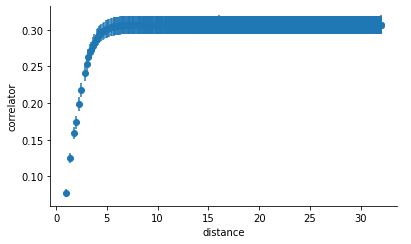

nt6


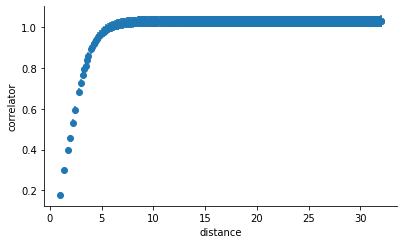

nt8


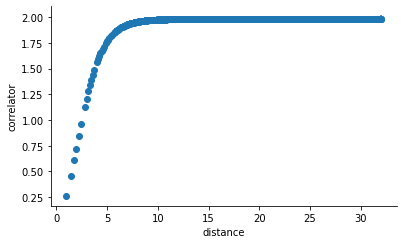

nt10


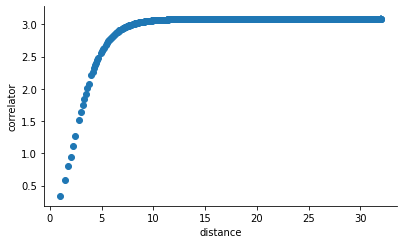

nt12


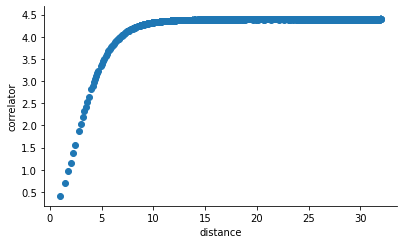

nt14


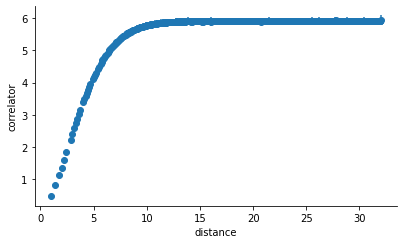

nt16_gov


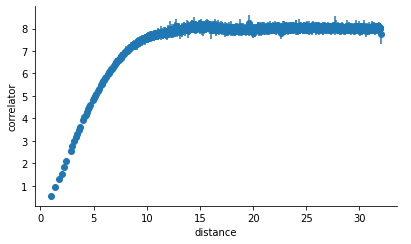

nt18_gov


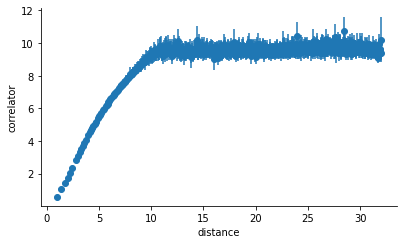

In [6]:
HYP = 1
sizes = ['nt4', 'nt6', 'nt8', 'nt10',
              'nt12', 'nt14', 'nt16_gov', 'nt18_gov']
for size in sizes:
    print(size)
    path = f'../result/polyakov_loop_correlator/su3/QCD/140MeV/{size}/HYP{HYP}_alpha=1_1_0.5/polyakov_correlator.csv'
    image_path = '../images/polyakov_loop_correlator/su3/QCD/140MeV'
    image_name = f'polyakov_correlator_{size}_HYP{HYP}'
    plot_polyakov_correlator(path, image_path, image_name)

In [42]:
def plot_single_polyakov_correlator(paths, image_path, image_name):
    data = []
    for size in paths:
        data.append(pd.read_csv(paths[size], index_col=None))
        temperature = 1/size
        data[-1]['correlator'] = data[-1]['correlator'] * temperature
        data[-1]['err'] = data[-1]['err'] * temperature
        data[-1]['nt'] = size

    data = pd.concat(data)

    data.to_csv('/home/ilya/soft/lattice/observables/result/polyakov_loop_correlator/su3/QCD/140MeV/full_data/correlators_HYP1', sep=' ')
    
    # df_data = df_data[df_data['T'] == T]
    # df_data = df_data[df_data['smearing_step'].isin(smearing_steps)]
    fg = seaborn.FacetGrid(data=data, hue = 'nt', height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'distance', 'correlator', 'err', marker="o", fmt='', linestyle = '').add_legend()
    plt.show()

    save_image(image_path, image_name, fg)

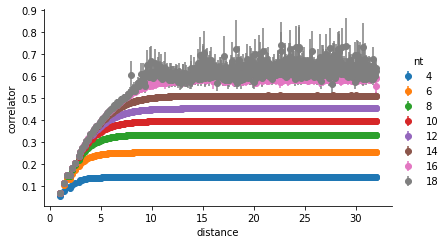

In [43]:
HYP = 1
sizes = [4, 6, 8, 10, 12, 14, 16, 18]

paths = {}
for size in sizes:
    if size < 16:
        nt = f'{size}'
    else:
        nt = f'{size}_gov'
    path = f'../result/polyakov_loop_correlator/su3/QCD/140MeV/nt{nt}/HYP{HYP}_alpha=1_1_0.5/polyakov_correlator.csv'
    paths[size] = path

image_path = '../images/polyakov_loop_correlator/su3/QCD/140MeV'
image_name = f'polyakov_correlator_common_HYP{HYP}'

plot_single_polyakov_correlator(paths, image_path, image_name)